In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading Dataset

df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [3]:
# basic Checks

df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

# No major missing values detected
# High variation in KM driven
# Outliers could exist

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.isnull().sum()  # find missing values

# not present

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [8]:
df.dtypes # checking datatypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [9]:
df.dtypes.value_counts()  # only one datatype is object

,count
int64,10
object,1


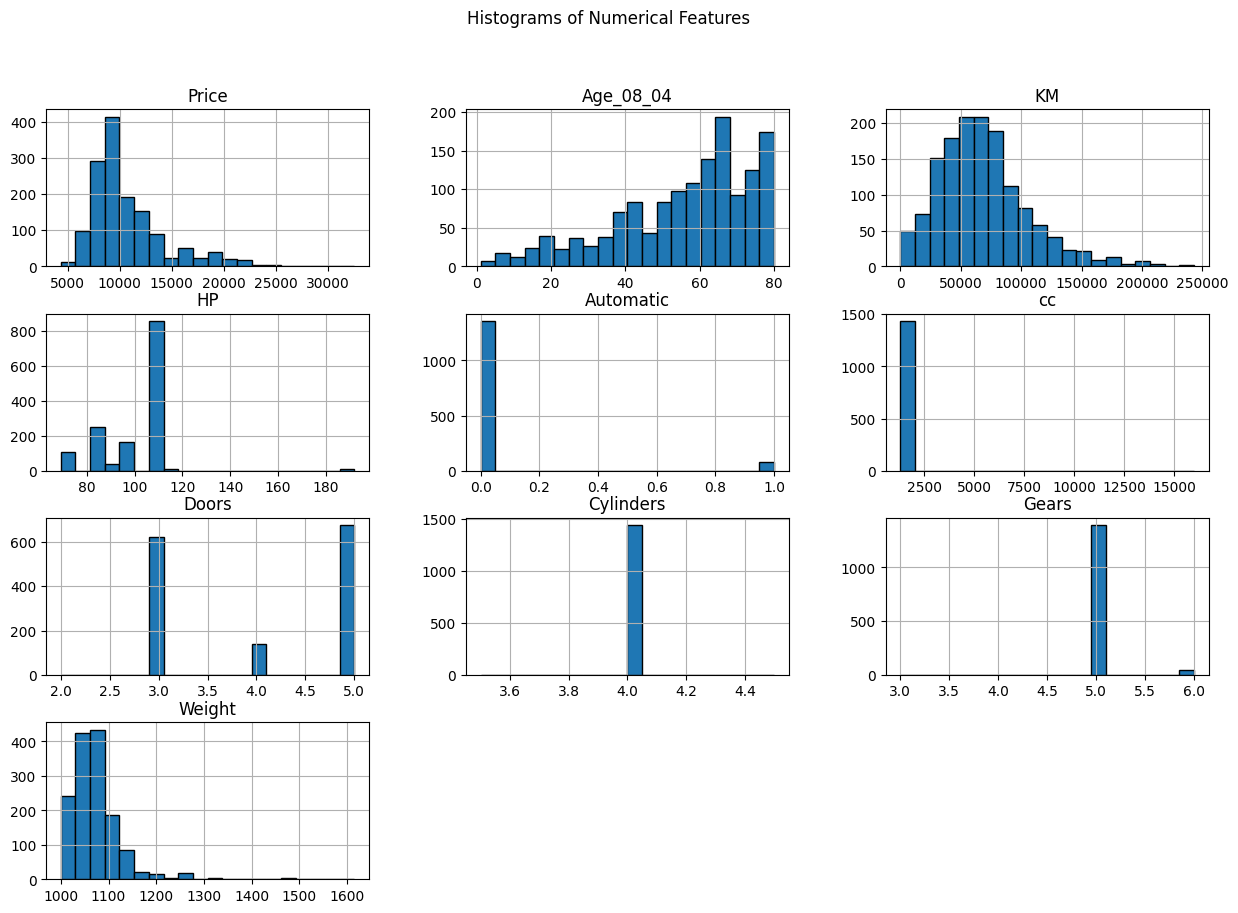

In [10]:
# Visualizations
# Histograms
df.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

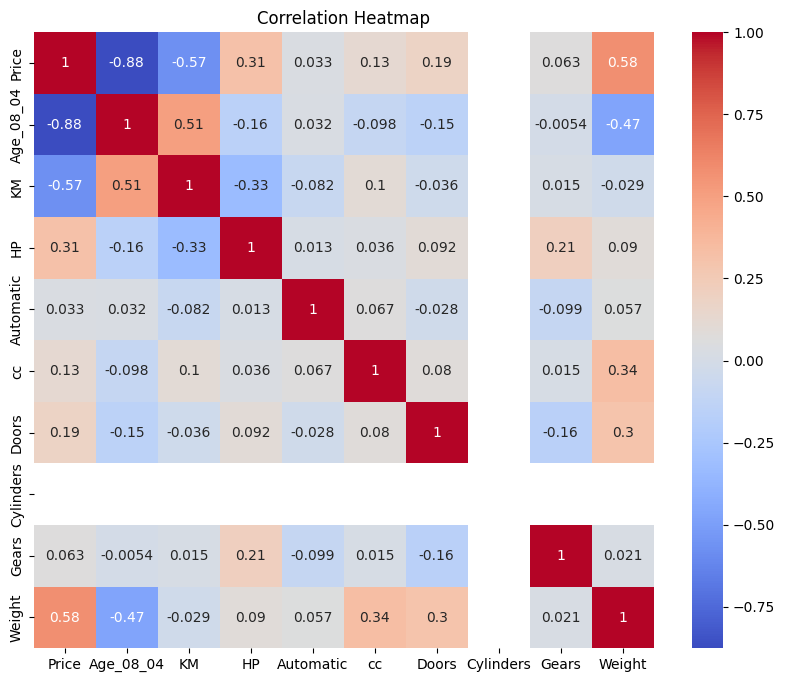

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

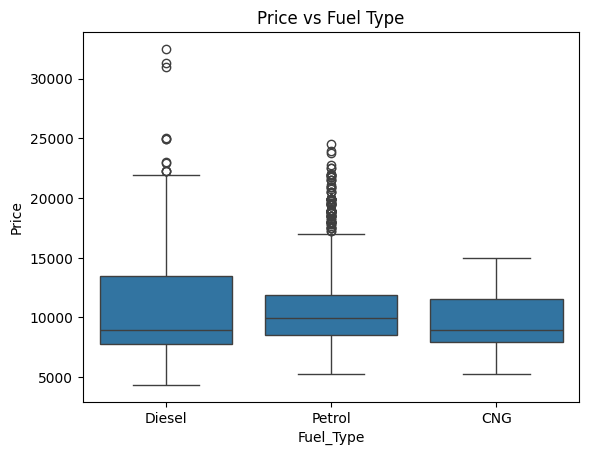

In [12]:

# Boxplot of Price vs Fuel_Type
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price vs Fuel Type')
plt.show()

 EDA Insights:

Age, KM and Weight show strong relationships with Price.

Diesel cars slightly more expensive than Petrol.

No missing values detected.

In [13]:
# One-hot encoding for 'Fuel_Type'
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


In [14]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [15]:
# Feature selection based on correlation
features = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Automatic']
X = df_encoded[features]
y = df_encoded['Price']

In [16]:
# Categorical variables like Fuel_Type are turned into numbers.

# Selected features that have good correlation with Price.

In [17]:
# 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Split Data To train on one set of data and test model performance on unseen data.

In [18]:
# Build 3 Different Multiple Linear Regression Models

# Build model 1 Basic MLR
model1 = LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

In [19]:
# Predict
y_pred1 = model1.predict(X_test)

In [20]:
# Coefficients
coefficients1 = pd.DataFrame({'Feature': X.columns, 'Coefficient': model1.coef_})
print(coefficients1)

            Feature  Coefficient
0         Age_08_04  -120.088735
1                KM    -0.017744
2                HP    17.064158
3            Weight    24.232348
4  Fuel_Type_Diesel -1136.954823
5         Automatic   130.644592


In [21]:
#Model 2: Add Interaction Feature (KM × Age)

# Create interaction feature
X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_train2['KM_Age'] = X_train2['KM'] * X_train2['Age_08_04']
X_test2['KM_Age'] = X_test2['KM'] * X_test2['Age_08_04']

# Build model
model2 = LinearRegression()
model2.fit(X_train2, y_train)

# Predict
y_pred2 = model2.predict(X_test2)


In [22]:
#Model 3: Use All Features (no feature selection)

# Use all features except Price
X_all = df_encoded.drop('Price', axis=1)
y_all = df_encoded['Price']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Build model
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

# Predict
y_pred3 = model3.predict(X_test3)


In [23]:
#Evaluate the Models

from sklearn.metrics import r2_score, mean_squared_error

# Function to evaluate
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return r2, mse

# Evaluations
print(f"Model 1 - R2: {evaluate(y_test, y_pred1)[0]:.3f}, MSE: {evaluate(y_test, y_pred1)[1]:.2f}")
print(f"Model 2 (interaction) - R2: {evaluate(y_test, y_pred2)[0]:.3f}, MSE: {evaluate(y_test, y_pred2)[1]:.2f}")
print(f"Model 3 (all features) - R2: {evaluate(y_test3, y_pred3)[0]:.3f}, MSE: {evaluate(y_test3, y_pred3)[1]:.2f}")


Model 1 - R2: 0.838, MSE: 2162116.42
Model 2 (interaction) - R2: 0.864, MSE: 1814246.77
Model 3 (all features) - R2: 0.835, MSE: 2203043.82


MLR is a method to predict a target variable (like Price) based on multiple independent variables (like Age, KM, HP, etc.)

R² measures how much of the variation in the target (Price) is explained by the model.
R²=1: Perfect model — it explains 100% of the variation.
R²=0: Useless model — explains 0% of the variation.
R² between 0 and 1: Higher is better.

MSE measures how much error, on average, the model makes in its predictions.
Lower MSE = better model (small errors).

In [24]:
# Apply Lasso and Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluation
print(f"Lasso - R2: {evaluate(y_test, y_pred_lasso)[0]:.3f}, MSE: {evaluate(y_test, y_pred_lasso)[1]:.2f}")
print(f"Ridge - R2: {evaluate(y_test, y_pred_ridge)[0]:.3f}, MSE: {evaluate(y_test, y_pred_ridge)[1]:.2f}")


Lasso - R2: 0.838, MSE: 2161458.84
Ridge - R2: 0.838, MSE: 2161311.98


In [25]:
#Lasso can shrink some coefficients to exactly zero (feature selection).

#Ridge shrinks coefficients but keeps all features.

In [26]:
# Summary

#MLR predicts continuous variables using many inputs.

#R² shows how good your model is.

#MSE shows how far off your predictions are.

#Lasso/Ridge improve models by controlling coefficients and avoiding overfitting.



Interview Questions:



1.What is Normalization & Standardization and how is it helpful? -> Normalization and standardization are data preprocessing techniques that rescale numeric data. Normalization scales data between 0 and 1, preventing feature dominance and enhancing model interpretability. Standardization transforms data to mean 0 and standard deviation 1, removing bias and scaling features equally. Both improve model accuracy, convergence speed and interpretability by ensuring balanced feature contributions and reducing data variability.

2.What techniques can be used to address multicollinearity in multiple linear regression? -> To address multicollinearity in multiple linear regression, consider these techniques:

1.Remove redundant variables: Drop highly correlated variables, retaining only one representative.

2.Regularization methods: Use Ridge, Lasso or Elastic Net regression to shrink coefficients.

3.Dimensionality reduction: Apply Principal Component Analysis (PCA) or Factor Analysis.

4.Variable transformation: Combine correlated variables into a single index.

5.Model selection: Choose models with lower variance inflation factors (VIF).

6.Cross-validation: Validate models on independent datasets.


These techniques mitigate multicollinearity's impact, enhancing model stability, accuracy and interpretability



In [26]:
# Done